In [1]:
from prob_model import *
%matplotlib inline
from IPython.display import *
import ipywidgets
from matplotlib.pyplot import *
%load_ext autoreload
%autoreload 2

In [2]:
nodes = {
    'coef':Subtopic('Pronumerals & coefficients'),
    'expr':Subtopic('Expressions and equations'),
    'conv':Subtopic('Algebraic conventions'),
    'patt':Subtopic('Describe number patterns'),
    'comb':Subtopic('Combining algebraic terms'),
    'oper':Subtopic('Order of operations'),
    'eval':Subtopic('Evaluating indices'),
    'simp':Subtopic('Simplifying negatives'),
    'mode':Subtopic('Algebraic modelling'),
    'frac':Subtopic('Algebraic fractions'),
    'expa':Subtopic('Expansion Identities'),
    'fact':Subtopic('Factorising'),
    'subs':Subtopic('Substitution'),
    'meas':Subtopic('Algebra and measurement')
}
nodes['coef'].set_children([nodes['conv']])
nodes['conv'].set_children([nodes['comb'], nodes['patt']])
nodes['comb'].set_children([nodes['oper'], nodes['eval'], nodes['simp']])
nodes['eval'].set_children([nodes['expa'], nodes['fact'], nodes['subs']])
nodes['expr'].set_children([nodes['comb'], nodes['patt']])
nodes['patt'].set_children([nodes['mode'], nodes['oper']])
nodes['oper'].set_children([nodes['frac'], nodes['expa'], nodes['frac'], nodes['subs']])
nodes['simp'].set_children([nodes['expa'], nodes['fact'], nodes['subs']])
nodes['mode'].set_children([nodes['meas']])

pos = {
    'Pronumerals & coefficients':(0,3),
    'Expressions and equations':(.2,4),
    'Algebraic conventions':(.2,2),
    'Describe number patterns':(.4,4),
    'Combining algebraic terms':(.4,2),
    'Order of operations':(.6,3),
    'Evaluating indices':(.6,2),
    'Simplifying negatives':(.6,1),
    'Algebraic modelling':(.6,4),
    'Algebraic fractions':(.8,4),
    'Expansion Identities':(.8,3),
    'Factorising':(.8,2),
    'Substitution':(.8,1),
    'Algebra and measurement':(.8,5)
}

items = {
    'equ':Item('which are equations (or) which are expressions?'),
    'var':Item('Give single variable expression, (a) what is the pronumeral/variable? (b) what is the coefficient of <term>?'),
    'sim':Item('Write <expression such as y*y + x[/]2> in its simplest form'),
    'sm1':Item('Simplify expression such as a*x^2 + b*xy - d*yx + e, where b - d > 0'),
    'rul':Item('Given table of values, write rule to fit pattern (linear rule; y = mx - b)'),
    'sm2':Item('Simplify expression such as a*x^2*y^3 [x] x^4*y^(-1)'),
    'sm3':Item('Simplify expression such as -y[x]-4 - (-y)^2'),
    'per':Item('Perimeter of quadrilateral'),
    'fra':Item('Rewrite algebraic fraction with negative powers on denominator'),
    'ex1':Item('Expand expression like (5x + 2y)^2'),
    'fac':Item('Factorise expression involving two indices of various powers'),
    'sb1':Item('Substitution like x^2 + a*x*z - b*y^3 incl. negatives'),
    'sb2':Item('Substitution involving negative & cube & fraction'),
    'tri':Item('Triangle pattern question'),
    'alg':Item('Write algebraic expression to represent worded situtation, of non-trivial complexity'),
    'pol':Item('(poly/poly)/(poly/poly)'),
    'len':Item('A right-angled triangle, one short side is k the length of the other. What is its perimeter in terms of x? (k<1 fraction)'),
    'sm4':Item('Simplify expression of the form k/x - 1/(x - a) + (c*x - d)/((x - a)*(x + b))'),
    'ex2':Item('Expand brackets of form (x-y)^3(y+x)^3'),
    'rep':Item('replacing xy with z, involving z^2 and distribution - x(xy^2-y)+y(x-x^2y) or similar - involves powers of z up to cubic'),
    'mea':Item('measurement verbal description and involving two variables with factorising')
}

items['equ'].link_subtopic(nodes['expr'],difficulty=0.4)
items['var'].link_subtopic(nodes['coef'],difficulty=0.6)
items['sim'].link_subtopic(nodes['conv'],difficulty=0.5)
items['sim'].link_subtopic(nodes['eval'],difficulty=0.3)
items['sm1'].link_subtopic(nodes['comb'])
items['rul'].link_subtopic(nodes['patt'],difficulty=0.8)
items['sm2'].link_subtopic(nodes['comb'])
items['sm2'].link_subtopic(nodes['eval'],difficulty=0.7)
# items['sm3'].link_subtopic(nodes['oper']) 
items['sm3'].link_subtopic(nodes['eval'],difficulty=0.4)
items['sm3'].link_subtopic(nodes['simp'],difficulty=0.8)
items['per'].link_subtopic(nodes['simp'],difficulty=0.7)
items['per'].link_subtopic(nodes['meas'],difficulty=0.4)
items['fra'].link_subtopic(nodes['eval'],difficulty=0.8)
items['fra'].link_subtopic(nodes['frac'],difficulty=1.2)
items['ex1'].link_subtopic(nodes['expa'])
items['fac'].link_subtopic(nodes['fact'],difficulty=1.1)
items['sb1'].link_subtopic(nodes['subs'],difficulty=1.4)
items['sb2'].link_subtopic(nodes['frac'])
items['sb2'].link_subtopic(nodes['subs'],difficulty=1.4)
items['tri'].link_subtopic(nodes['mode'],difficulty=1.3)
items['tri'].link_subtopic(nodes['subs'])
items['alg'].link_subtopic(nodes['mode'],difficulty=0.8)
items['alg'].link_subtopic(nodes['meas'],difficulty=0.5)
items['pol'].link_subtopic(nodes['simp'],difficulty=0.4)
items['pol'].link_subtopic(nodes['frac'],difficulty=1.7)
#items['pol'].link_subtopic(nodes['fact'],difficulty=0.4)
items['len'].link_subtopic(nodes['fact'])
items['len'].link_subtopic(nodes['meas'],difficulty=1.7)
items['sm4'].link_subtopic(nodes['frac'])
items['sm4'].link_subtopic(nodes['expa'],difficulty=1.6)
items['ex2'].link_subtopic(nodes['expa'],difficulty=1.7)
items['rep'].link_subtopic(nodes['frac'])
items['rep'].link_subtopic(nodes['expa'],difficulty=1.8)
items['rep'].link_subtopic(nodes['subs'],difficulty=1.4)
items['mea'].link_subtopic(nodes['frac'])
items['mea'].link_subtopic(nodes['fact'],difficulty=2)
items['mea'].link_subtopic(nodes['subs'])
items['mea'].link_subtopic(nodes['meas'],difficulty=2)

item_set = ['equ',
    'var',   
    'sim',   
    'sm1',   
    'rul',  
    'sm2',   
    'sm3',   
    'per',   
    'fra',   
    'ex1',   
    'fac',   
    'sb1',   
    'sb2',   
    'tri',   
    'alg',   
    'pol',   
    'len',
    'sm4',   
    'ex2',   
    'rep',
    'mea']

graph = Network(nodes.values(), item_list=items.values(), axlr=1.)
graph.set_parents()

In [3]:
if_all_parents_mastered = .7
nodes['coef'].set_prior_probability(0.9)
nodes['expr'].set_prior_probability(0.9)
nodes['conv'].set_cond_prob(if_all_parents_mastered)
nodes['comb'].set_cond_prob(if_all_parents_mastered)
nodes['eval'].set_cond_prob(if_all_parents_mastered)
nodes['patt'].set_cond_prob(if_all_parents_mastered)
nodes['oper'].set_cond_prob(if_all_parents_mastered)
nodes['simp'].set_cond_prob(if_all_parents_mastered)
nodes['mode'].set_cond_prob(if_all_parents_mastered)
nodes['frac'].set_cond_prob(if_all_parents_mastered)
nodes['expa'].set_cond_prob(if_all_parents_mastered)
nodes['fact'].set_cond_prob(if_all_parents_mastered)
nodes['subs'].set_cond_prob(if_all_parents_mastered)
nodes['meas'].set_cond_prob(if_all_parents_mastered)

graph.forward_propagate([nodes['coef'], nodes['expr']])
graph.forward_pair()
graph.observation_damp_factor()

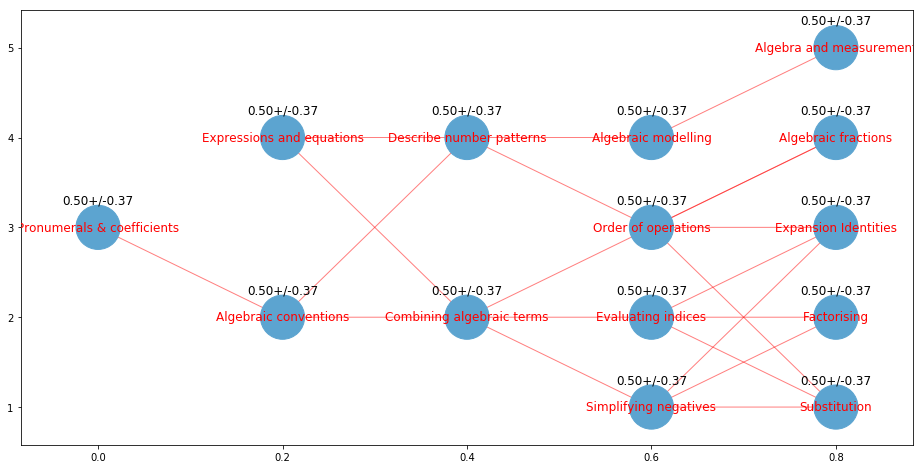

In [4]:
graph.reset_nk(n_prior=0)
graph.draw_network(pos=pos)

In [5]:
correct = ipywidgets.Button(description="Correct")
wrong = ipywidgets.Button(description="Wrong")
out = ipywidgets.Output()

i = 0            
num_item = len(item_set)
def correct_clicked(b):
    global i
    if i >= num_item: return
    item = items[item_set[i]]
    i += 1
    item.correct()
    with out:
        clear_output(True)
        if i < num_item:
            item_next = items[item_set[i]]
            print item_next.name, '/ Collections:'
            for linked_node in item_next.property:
                print linked_node[0].name
        graph.single_update(item)
        graph.draw_network(pos=pos)

def wrong_clicked(b):
    global i
    if i >= num_item: return
    item = items[item_set[i]]
    i += 1
    item.wrong()
    with out:
        clear_output(True)
        if i < num_item:
            item_next = items[item_set[i]]
            print item_next.name, '/ Collections:'
            for linked_node in item_next.property:
                print linked_node[0].name
        graph.single_update(item)
        graph.draw_network(pos=pos)

correct.on_click(correct_clicked)
wrong.on_click(wrong_clicked)
display(correct)
display(wrong)

with out:
    item = items[item_set[i]]
    print item.name, '/ Collections:'
    for linked_node in item.property:
        print linked_node[0].name
    graph.draw_network(pos=pos)

out

Button(description=u'Correct', style=ButtonStyle())

Button(description=u'Wrong', style=ButtonStyle())

Output()

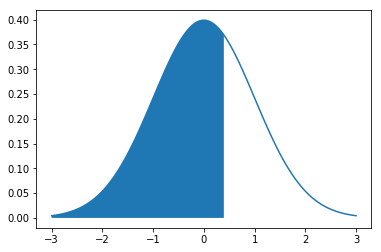

In [14]:
nodes['coef'].demon(p=.05, gaussian=True)

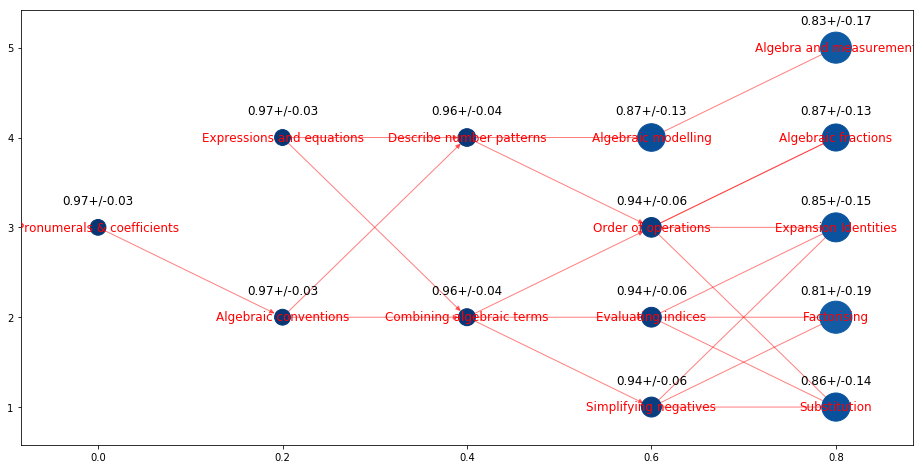

In [12]:
graph.reset_nk(n_prior=0)
for key in item_set:
    items[key].correct()
    graph.single_update(items[key])
graph.draw_network(pos=pos)

prob_model.py:657: RuntimeWarning: invalid value encountered in double_scalars
  node.k += min(deltak[j], node.k * deltan[j] / node.n)


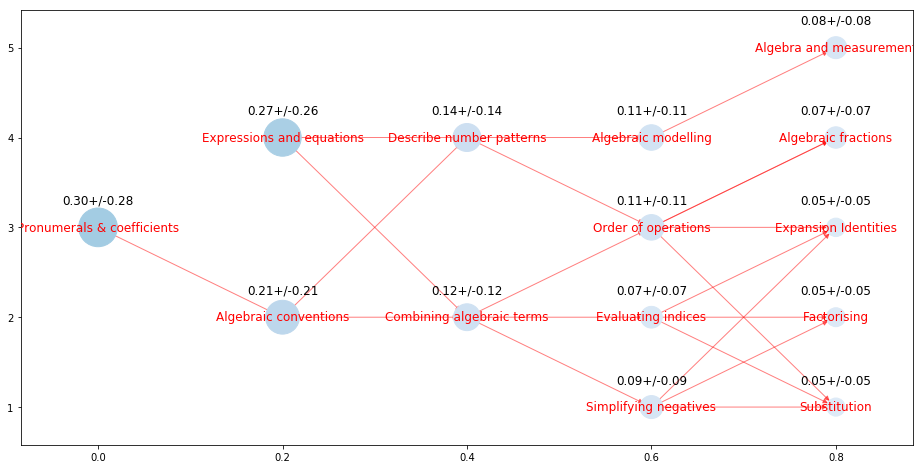

In [13]:
graph.reset_nk(n_prior=0)
for key in item_set:
    items[key].wrong()
    graph.single_update(items[key])
graph.draw_network(pos=pos)